# CCA explore


## Here try to get to grips with CCA

The basic approach is the following. You have two things that have the same underlying dynamics in different subspaces. What I guess you are doing is solving an eigenvalue problem on the cross covariance matrix?? Is that right?

In other way what you do is to do an SVD on both data matrices. Then you


## Interpretation

What is the prediction of the principal angles between movements in different directions...?


## CCA just works

CCA will just naively work here since it is a rotation of the data

In [479]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set(font_scale=1.5,style='ticks')

In [480]:
n_neurons = 200
n_timepoints = 9
n_dims = 2

t = np.linspace(0,(2*np.pi)*(n_timepoints)/n_timepoints,num=9)
#t = np.linspace(0,(2*np.pi),num=n_timepoints)

#dyn_mtx = np.random.normal(size=(n_dims,n_timepoints))
dyn_mtx = np.vstack([np.sin(t),np.cos(t)])
if n_dims==4: dyn_mtx = np.vstack([[np.sin(t),np.cos(t)],[np.sin(2*t),np.cos(2*t)]])

#print(dyn_mtx.shape)

In [481]:
P1 = np.random.normal(size=(n_neurons,n_dims))
P2 = np.random.normal(size=(n_neurons,n_dims))

In [482]:
D1 = np.fliplr(np.roll(np.dot(P1,dyn_mtx),1,axis=1)) + .5*np.random.normal(size=(n_neurons,1))@np.random.normal(size=(1,n_timepoints))
D2 = np.dot(P1,dyn_mtx) + .5*np.random.normal(size=(n_neurons,1))@np.random.normal(size=(1,n_timepoints))
#D2 = D2[:,np.random.permutation(np.arange(n_timepoints))]

In [483]:
#D1 = np.dot(P1,dyn_mtx)
#D2 = np.dot(P2,dyn_mtx) #+ 5 + get_noise(n_neurons,n_timepoints,2)
#D2 = D2[:,np.random.permutation(np.arange(9))]

In [484]:
#from sklearn

In [485]:
D1 = (D1 - np.mean(D1,axis=0))
D2 = (D2 - np.mean(D2,axis=0))

# Run da model 

In [486]:
U1,S1,V1 = np.linalg.svd(D1)
U2,S2,V2 = np.linalg.svd(D2)

In [487]:
hat_dims = 4
Uhat1 = U1[:,:hat_dims]
Uhat2 = U2[:,:hat_dims]

In [489]:
prods = Uhat1.T@Uhat2

In [490]:
Uo,So,Vo = np.linalg.svd(prods)

In [491]:
So

array([1.        , 1.        , 0.25570909, 0.01256339])

In [492]:
import math

In [493]:
np.arccos(So)

array([0.00000000e+00, 2.10734243e-08, 1.31221522e+00, 1.55823261e+00])

In [494]:
np.rad2deg(np.arccos(So))

array([0.00000000e+00, 1.20741827e-06, 7.51843938e+01, 8.92801519e+01])

In [495]:
L1 = np.dot(Uhat1.T,D1)
L2 = np.dot(Uhat2.T,D2)

In [496]:
Q1,R1 = np.linalg.qr(L1.T)
Q2,R2 = np.linalg.qr(L2.T)

In [497]:
R1.shape

(4, 4)

In [498]:
Ub,Sb,Vb = np.linalg.svd(Q1.T@Q2)

In [499]:
#np.linalg.inv(R1)

In [500]:
#np.linalg.inv(R1)

In [501]:
M1 = np.linalg.pinv(R1)@Ub
M2 = np.linalg.pinv(R2)@Vb.T

In [502]:
L1.shape

(4, 9)

In [503]:
np.dot(M1.T,L1).shape

(4, 9)

In [504]:
np.dot(M2.T,L2).shape

(4, 9)

In [505]:
Uf,Sf,Vf = np.linalg.svd(np.dot(M1.T,L1).T@np.dot(M2.T,L2))

In [506]:
math.acos(0)

1.5707963267948966

In [507]:
np.rad2deg(np.nan_to_num(np.arccos(Sf),0))

array([0.00000000e+00, 8.53773646e-07, 7.25294703e+01, 9.00000000e+01,
       9.00000000e+01, 9.00000000e+01, 9.00000000e+01, 9.00000000e+01,
       9.00000000e+01])

In [508]:
ix = 1
np.corrcoef(np.dot(M1.T,L1)[ix],np.dot(M2.T,L2)[ix])

array([[1.        , 0.94096907],
       [0.94096907, 1.        ]])

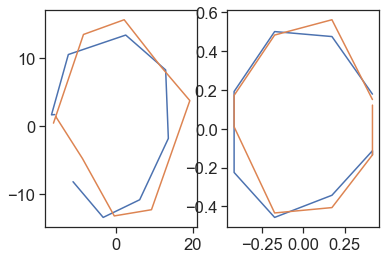

In [509]:
ix = 0

plt.subplot(1,2,1)
plt.plot(L1[0],L1[1])
plt.plot(L2[0],L2[1])


plt.subplot(1,2,2)
plt.plot(np.dot(M1.T,L1)[ix],np.dot(M1.T,L1)[ix+1])
plt.plot(np.dot(M2.T,L2)[ix],np.dot(M2.T,L2)[ix+1])


In [510]:
np.dot(M2.T,L2)[1]

array([ 0.1505971 ,  0.56177292,  0.48288516,  0.17199887,  0.00992784,
       -0.43387125, -0.40618974, -0.13473513,  0.1219223 ])

In [511]:
np.dot(M2.T,L2)[0]

array([ 0.41935849,  0.17370397, -0.17370397, -0.41935849, -0.41935849,
       -0.17370397,  0.17370397,  0.41935849,  0.41935849])

In [512]:
np.dot(M1.T,L1)[1]

array([ 0.17833272,  0.47515401,  0.50079314,  0.19211233, -0.22514915,
       -0.45684603, -0.34270319, -0.11305989, -0.13496909])

In [513]:
np.dot(M1.T,L1)[0]

array([ 0.41935849,  0.17370397, -0.17370397, -0.41935849, -0.41935849,
       -0.17370397,  0.17370397,  0.41935849,  0.41935849])